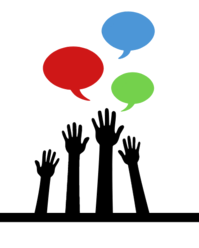






# **The Sparks Foundation Internship April 2021**

# **Muhammad Bilal Tahir**

# **Predicting Marks Project**

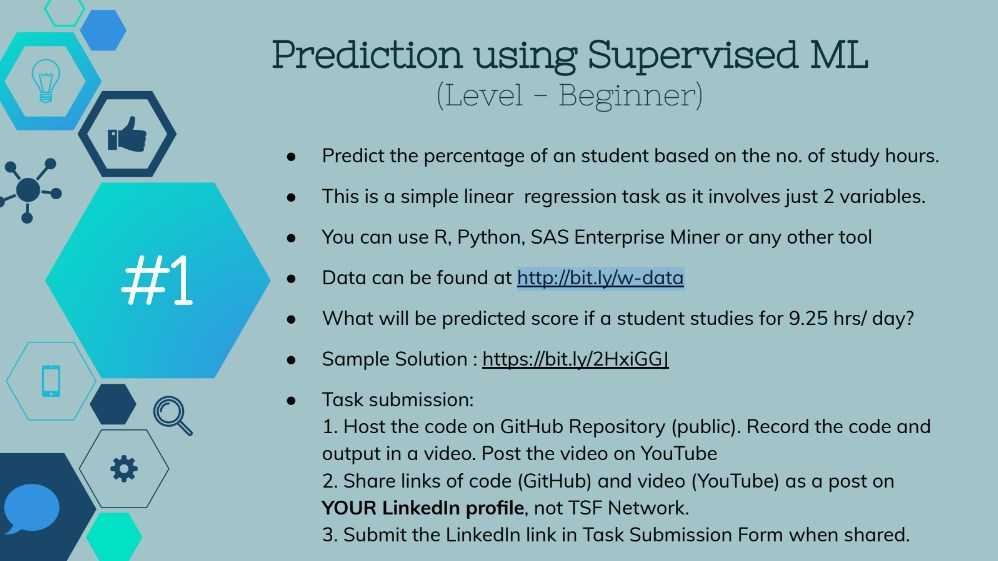

# **Data Preprocessing**

In [109]:
# We will import the following libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [110]:
# Read the uploaded Excel file 
Marks = pd.read_excel("Marks.xlsx")

In [111]:
# Print Head (first five rows)
Marks.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [114]:
# Check columns in our dataset
Marks.columns

Index(['Hours', 'Scores'], dtype='object')

# **Data Visualization**

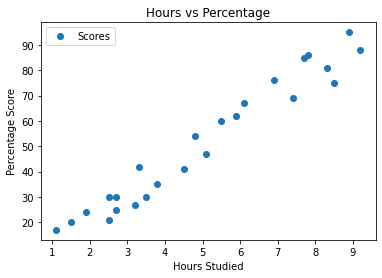

In [115]:
# Plotting the distribution of scores
Marks.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [116]:
X = Marks[['Hours']].values
X[0:]

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [117]:
y = Marks['Scores'].values
y[0:]

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

# **Machine Learning Prediction using Linear Regression**

1. **Testing and Training**

2. **Accuracy Check**

Now  divide the data into "attributes" (inputs) and "labels" (outputs)

In [118]:
X = Marks.iloc[:, :-1].values  
y = Marks.iloc[:, 1].values  

In [119]:
indx = np.random.rand(len(Marks))<0.8
train = Marks[indx]
test = Marks[~indx]

In [120]:
# Test and Train dataset shape is clearly visible
train.shape, test.shape

((20, 2), (5, 2))

In [121]:
from sklearn import linear_model
lreg = linear_model.LinearRegression()

# Divide your train data into independent and dependent variable e.g x and y
train_x = np.asanyarray(train['Hours'])
train_y = np.asanyarray(train['Scores'])
lreg.fit(train_x.reshape(-1,1),train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
print('Theta-0: ', lreg.coef_)
print('Theta-1:', lreg.intercept_)

Theta-0:  [9.93479577]
Theta-1: 0.6975385631224711


In [123]:
# With the following code, we can see that if a person studies 9.25 Hours, They may probably score 92.594 marks.
lreg.predict([[9.25]])

array([92.59439941])

In [124]:
# Validate our model through test data

test_x = np.asanyarray(test['Hours'])
test_y = np.asanyarray(test['Scores'])
test_y_hat = lreg.predict(test_x.reshape(-1,1))

In [125]:
print('RE (MSE): %2f'%np.mean((test_y_hat - test_y) **2))

RE (MSE): 27.263258


The result shows that our model has an **accuracy of 95%** which is superb.

In [126]:
#Check accuracy using R2 score
from sklearn.metrics import r2_score

print('R2 Score: %2f'%r2_score(test_y_hat,test_y))


R2 Score: 0.959225


Scatter Plot to show the positive relation with our results included.

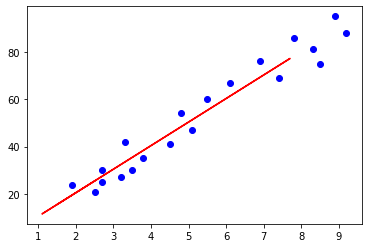

In [127]:
plt.scatter(train.Hours,train.Scores,color='blue')
plt.plot(test_x, test_y_hat, 'r-')
plt.show()